In [26]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("E:/Coding/Blinkit Analysis/BlinkIT Grocery Data.csv")

In [28]:
print(df.head(10))

  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   
5          low fat           FDS52           Frozen Foods   
6          Low Fat           NCU05     Health and Hygiene   
7          Low Fat           NCD30              Household   
8          Low Fat           FDW20  Fruits and Vegetables   
9          Low Fat           FDX25                 Canned   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT0

In [29]:
print('Size of data:',df.shape)

Size of data: (8523, 12)


In [30]:
#Data Cleaning
df['Item Fat Content'] = df['Item Fat Content'].replace({'low fat': 'Low Fat',
                                                        'LF': 'Low Fat',
                                                        'reg': 'Regular'})

In [31]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


KPI Requirements

In [32]:
#Total Sales
total_sales = df['Sales'].sum()
#Average Sales
avg_sales = df['Sales'].mean()
#No. of Items
no_of_items_sold = df['Sales'].count()
#Average Rating
avg_rating = df['Rating'].mean()

In [33]:
print(f'Total Sales: ${total_sales:,.0f}')
print(f'Average Sales: ${avg_sales:,.0f}')
print(f'No. of Items Sold: ${no_of_items_sold:,.0f}')
print(f'Average Rating: {avg_rating:,.1f}')

Total Sales: $1,201,681
Average Sales: $141
No. of Items Sold: $8,523
Average Rating: 4.0


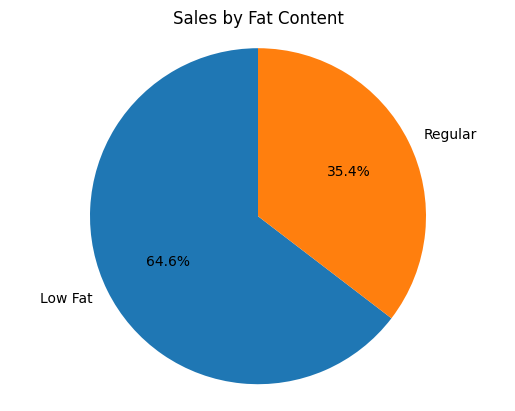

In [34]:
#Total Sales By Fat Content

sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels = sales_by_fat.index,
autopct = '%.1f%%',
startangle = 90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

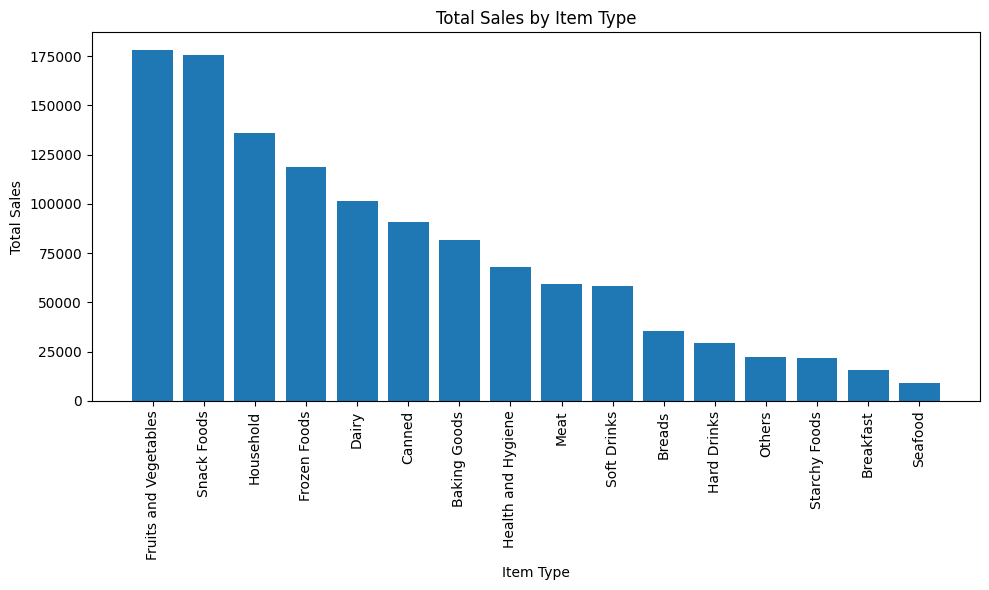

In [35]:
#Total Sales by Item Type

Sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
bars = plt.bar(Sales_by_type.index,Sales_by_type.values)

plt.xticks(rotation= 90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

plt.tight_layout()
plt.show()

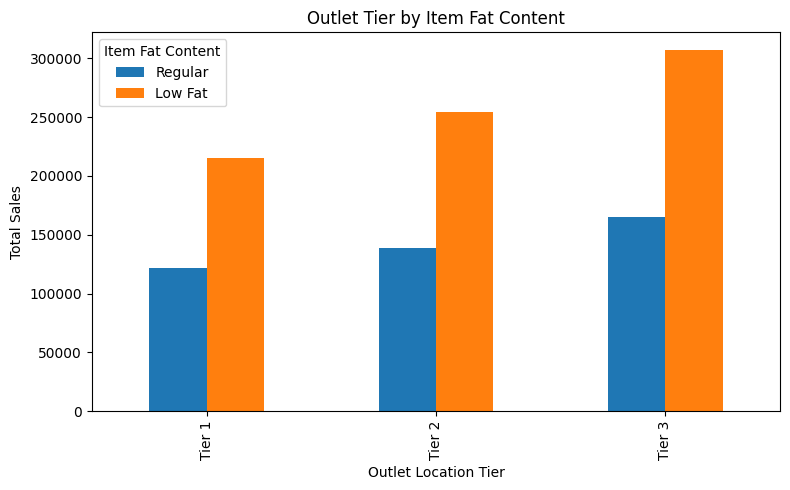

In [36]:
# Fat Content by Outlet for Total Sales

grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack() 
grouped = grouped [['Regular', 'Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')

plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

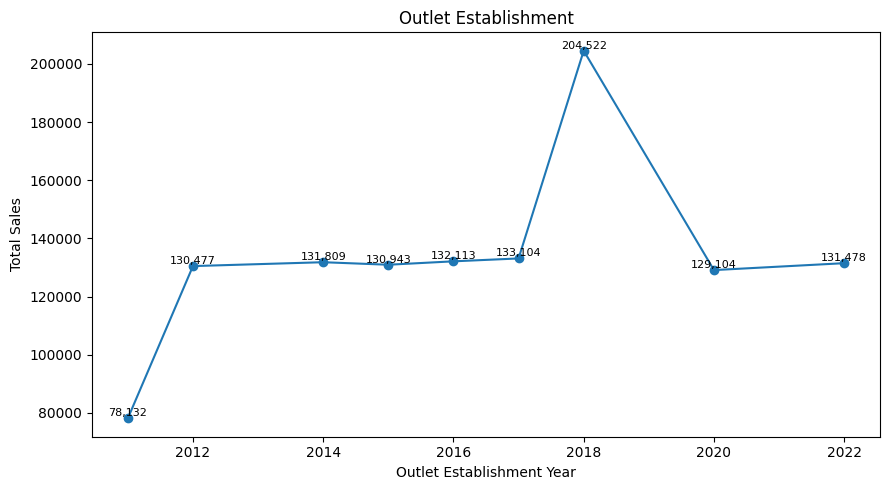

In [37]:
#Total Sales by Outlet Establishment

sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

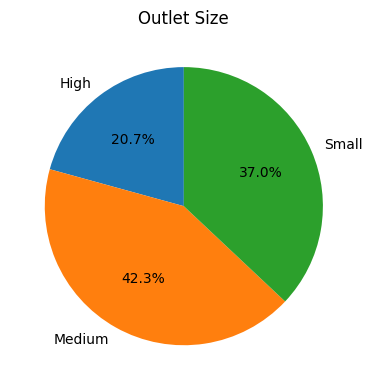

In [38]:
#Sales by Outlet Size

Sales_by_size = df.groupby('Outlet Size') ['Sales'].sum()
plt.figure(figsize=(4, 4))
plt.pie(Sales_by_size, labels=Sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')

plt.tight_layout()
plt.show()

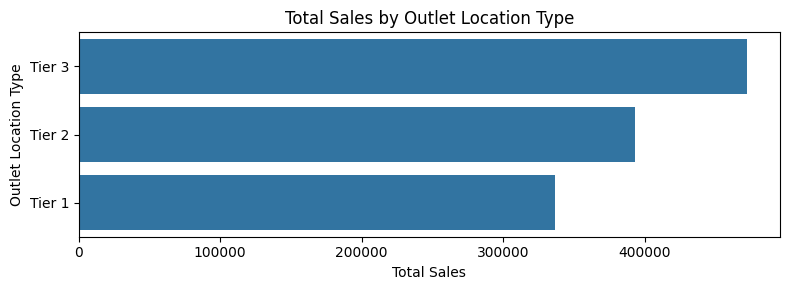

In [39]:
#Sales by Outlet Location

Sales_by_location = df.groupby('Outlet Location Type') ['Sales'].sum().reset_index()
Sales_by_location = Sales_by_location.sort_values('Sales', ascending=False)

plt.figure(figsize=(8, 3)) # Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=Sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout() # Ensures layout fits without scroll
plt.show()